candidate no: 244851

# Introduction

The goal of this project is to help develop hardware and/or software which can determine the type of physical activity carried out by an individual and to get actionable insights by using PAMAP2 Physical Activity Monitoring dataset http://archive.ics.uci.edu/ml/datasets/pamap2+physical+activity+monitoring  

It contains data of 18 different physical activities (such as walking, cycling, playing soccer etc) performed by 9 subjects wearing 3 inertial measurement units (IMU) and a heart rate monitor. This data is stored in individual text files per subject. Each row in each file represents one reading and contains 54 attributes (including timestamp, activity ID, heart rate and IMU sensory data). Among 18 phyiscal activities only 12 activities are protocol activities and we will be focusing only on this 12 activities and our final aim will be to find a suitable machine learning model to predict which type of physical activity a person is doing among this 12 activities

The whole project is classified into 3 major sections

1. Data Loading, Cleaning and performing Exploritory Data Analysis.
1. Hypothesis testing for relationship between attributes.
1. Supervised machine learning modelling to predict the activity performed by the person.

In [ ]:
#importing necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.decomposition import PCA
import numpy as np
from sklearn.model_selection import StratifiedKFold
import seaborn as sn
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler, RobustScaler
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.model_selection import train_test_split
from IPython.display import display
sn.set()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the dataset
for (root,dirs,files) in os.walk('/content/drive/My Drive/Colab Notebooks/protocol'):
  pass
for (root_, dirs_, files_) in os.walk('/content/drive/My Drive/Colab Notebooks/Optional'):
  pass

files_optional_id = []
files_protocol_id = []
for i in range(len(files)):
  files_protocol_id.append(root+'/'+files[i])

for i in range(len(files_)):
  files_optional_id.append(root+'/'+files_[i])

In [ ]:
files_optional_id

['/content/drive/My Drive/Colab Notebooks/protocol/subject101.dat',
 '/content/drive/My Drive/Colab Notebooks/protocol/subject105.dat',
 '/content/drive/My Drive/Colab Notebooks/protocol/subject106.dat',
 '/content/drive/My Drive/Colab Notebooks/protocol/subject108.dat',
 '/content/drive/My Drive/Colab Notebooks/protocol/subject109.dat']

In [ ]:
files_protocol_id

['/content/drive/My Drive/Colab Notebooks/protocol/subject101.dat',
 '/content/drive/My Drive/Colab Notebooks/protocol/subject102.dat',
 '/content/drive/My Drive/Colab Notebooks/protocol/subject103.dat',
 '/content/drive/My Drive/Colab Notebooks/protocol/subject104.dat',
 '/content/drive/My Drive/Colab Notebooks/protocol/subject105.dat',
 '/content/drive/My Drive/Colab Notebooks/protocol/subject106.dat',
 '/content/drive/My Drive/Colab Notebooks/protocol/subject107.dat',
 '/content/drive/My Drive/Colab Notebooks/protocol/subject108.dat',
 '/content/drive/My Drive/Colab Notebooks/protocol/subject109.dat']

In [ ]:
# activity id dictonary is created according to the dataset
activity_id = {0: 'transient', 1:'lying', 2:'sitting', 3:'standing',
              4:'walking', 5:'running', 6:'cycling', 7:'Nordic walking',
              9:'watching TV', 10:'computer work', 11:'car driving',
              12:'ascending stairs', 13:'descending stairs', 16:'vacuum cleaning',
              17:'ironing', 18:'folding laundry', 19:'house cleaning',
              20:'playing soccer', 24:'rope jumping'}


In [ ]:
#just in case we want to capture the activity name from the numeric id
activity_id_reverse = {}
for key in activity_id.keys():
  value = activity_id.get(key)
  activity_id_reverse[value] = key

In [ ]:
activity_id_reverse

{'Nordic walking': 7,
 'ascending stairs': 12,
 'car driving': 11,
 'computer work': 10,
 'cycling': 6,
 'descending stairs': 13,
 'folding laundry': 18,
 'house cleaning': 19,
 'ironing': 17,
 'lying': 1,
 'playing soccer': 20,
 'rope jumping': 24,
 'running': 5,
 'sitting': 2,
 'standing': 3,
 'transient': 0,
 'vacuum cleaning': 16,
 'walking': 4,
 'watching TV': 9}

In [ ]:
col_names = []

In [ ]:
#developing the column name for the data
col_names=['timestamp', 'activity_id', 'heart_rate']

IMU_locations = ['hand', 'chest', 'ankle']
IMU_data = ['tmp', 'acc_16_01', 'acc_16_02', 'acc_16_03',
            'acc_06_01', 'acc_06_02', 'acc_06_03',
            'gyr_01', 'gyr_02', 'gyr_03',
            'mag_01', 'mag_02', 'mag_03',
            'ori_01', 'ori_02', 'ori_03', 'ori_04']


In [ ]:
colnames = col_names+ [j+'_'+i  for i in IMU_locations for j in IMU_data]
colnames


['timestamp',
 'activity_id',
 'heart_rate',
 'tmp_hand',
 'acc_16_01_hand',
 'acc_16_02_hand',
 'acc_16_03_hand',
 'acc_06_01_hand',
 'acc_06_02_hand',
 'acc_06_03_hand',
 'gyr_01_hand',
 'gyr_02_hand',
 'gyr_03_hand',
 'mag_01_hand',
 'mag_02_hand',
 'mag_03_hand',
 'ori_01_hand',
 'ori_02_hand',
 'ori_03_hand',
 'ori_04_hand',
 'tmp_chest',
 'acc_16_01_chest',
 'acc_16_02_chest',
 'acc_16_03_chest',
 'acc_06_01_chest',
 'acc_06_02_chest',
 'acc_06_03_chest',
 'gyr_01_chest',
 'gyr_02_chest',
 'gyr_03_chest',
 'mag_01_chest',
 'mag_02_chest',
 'mag_03_chest',
 'ori_01_chest',
 'ori_02_chest',
 'ori_03_chest',
 'ori_04_chest',
 'tmp_ankle',
 'acc_16_01_ankle',
 'acc_16_02_ankle',
 'acc_16_03_ankle',
 'acc_06_01_ankle',
 'acc_06_02_ankle',
 'acc_06_03_ankle',
 'gyr_01_ankle',
 'gyr_02_ankle',
 'gyr_03_ankle',
 'mag_01_ankle',
 'mag_02_ankle',
 'mag_03_ankle',
 'ori_01_ankle',
 'ori_02_ankle',
 'ori_03_ankle',
 'ori_04_ankle']

In [ ]:
#Loading all the seperate files into a single dataframe
df_raw = pd.DataFrame() 
for i in files_protocol_id : 
  int_data = pd.read_table(i , names = colnames, sep = '\s+')
  int_data['SubjectID'] = int(i[-5])
  df_raw = df_raw.append(int_data, ignore_index = True)
  



In [ ]:
#The initial raw dataframe
pd.set_option('display.max_columns',None)
df_raw


,timestamp,activity_id,heart_rate,tmp_hand,acc_16_01_hand,acc_16_02_hand,acc_16_03_hand,acc_06_01_hand,acc_06_02_hand,acc_06_03_hand,gyr_01_hand,gyr_02_hand,gyr_03_hand,mag_01_hand,mag_02_hand,mag_03_hand,ori_01_hand,ori_02_hand,ori_03_hand,ori_04_hand,tmp_chest,acc_16_01_chest,acc_16_02_chest,acc_16_03_chest,acc_06_01_chest,acc_06_02_chest,acc_06_03_chest,gyr_01_chest,gyr_02_chest,gyr_03_chest,mag_01_chest,mag_02_chest,mag_03_chest,ori_01_chest,ori_02_chest,ori_03_chest,ori_04_chest,tmp_ankle,acc_16_01_ankle,acc_16_02_ankle,acc_16_03_ankle,acc_06_01_ankle,acc_06_02_ankle,acc_06_03_ankle,gyr_01_ankle,gyr_02_ankle,gyr_03_ankle,mag_01_ankle,mag_02_ankle,mag_03_ankle,ori_01_ankle,ori_02_ankle,ori_03_ankle,ori_04_ankle,SubjectID
0,8.38,0,104.0,30.0000,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,-0.092217,0.056812,-0.015845,14.6806,-69.2128,-5.58905,1.000000,0.000000,0.000000,0.000000,31.8125,0.238080,9.80003,-1.688960,0.265304,9.81549,-1.413440,-0.005065,-0.006781,-0.005663,0.471960,-51.0499,43.2903,1.000000,0.000000,0.000000,0.000000,30.3125,9.65918,-1.655690,-0.099797,9.64689,-1.555760,0.310404,0.008300,0.009250,-0.017580,-61.1888,-38.95990,-58.143800,1.000000,0.000000,0.000000,0.000000,1
1,8.39,0,NaN,30.0000,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,-0.024413,0.047758,0.006474,14.8991,-69.2224,-5.82311,1.000000,0.000000,0.000000,0.000000,31.8125,0.319530,9.61282,-1.493280,0.234939,9.78539,-1.428460,0.013685,0.001486,-0.041522,1.016900,-50.3966,43.1768,1.000000,0.000000,0.000000,0.000000,30.3125,9.69370,-1.579020,-0.215687,9.61670,-1.616300,0.280488,-0.006577,-0.004638,0.000368,-59.8479,-38.89190,-58.525300,1.000000,0.000000,0.000000,0.000000,1
2,8.40,0,NaN,30.0000,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,-0.057976,0.032574,-0.006988,14.2420,-69.5197,-5.12442,1.000000,0.000000,0.000000,0.000000,31.8125,0.235593,9.72421,-1.766210,0.173850,9.72528,-1.518940,-0.039923,0.034056,-0.002113,0.383136,-51.8336,43.7782,1.000000,0.000000,0.000000,0.000000,30.3125,9.58944,-1.732760,0.092914,9.63173,-1.586050,0.280311,0.003014,0.000148,0.022495,-60.7361,-39.41380,-58.399900,1.000000,0.000000,0.000000,0.000000,1
3,8.41,0,NaN,30.0000,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,-0.002352,0.032810,-0.003747,14.8908,-69.5439,-6.17367,1.000000,0.000000,0.000000,0.000000,31.8125,0.388697,9.53572,-1.724100,0.157969,9.64994,-1.579520,0.007513,-0.010498,-0.020684,0.315400,-49.8144,43.1670,1.000000,0.000000,0.000000,0.000000,30.3125,9.58814,-1.770400,0.054545,9.63197,-1.631350,0.340997,0.003175,-0.020301,0.011275,-60.4091,-38.76350,-58.395600,1.000000,0.000000,0.000000,0.000000,1
4,8.42,0,NaN,30.0000,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,0.012269,0.018305,-0.053325,15.5612,-68.8196,-6.28927,1.000000,0.000000,0.000000,0.000000,31.8125,0.315800,9.49908,-1.609140,0.233506,9.57411,-1.444180,-0.003822,-0.011217,-0.025975,-0.297733,-51.8097,43.6453,1.000000,0.000000,0.000000,0.000000,30.3125,9.69771,-1.656250,-0.060809,9.64699,-1.646470,0.340965,0.012698,-0.014303,-0.002823,-61.5199,-39.38790,-58.269400,1.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872528,100.19,0,NaN,25.1875,-4.71493,10.22250,4.66893,-5.04654,9.94944,4.50736,1.784060,0.087985,0.934673,21.1701,-35.3878,-34.04430,0.558630,-0.593878,0.292228,0.499844,32.3750,2.926640,10.21030,-0.983335,3.125630,10.62120,0.642058,-0.034671,-0.222172,-0.191336,15.599100,-40.9116,14.9966,0.625172,-0.760781,-0.039443,-0.169753,31.5000,9.38737,-0.565040,-3.273700,9.09401,-0.228554,-2.687700,-0.037788,-0.062676,-0.127084,-46.5153,3.58240,-0.035995,0.598531,0.033615,0.799791,-0.031075,9
2872529,100.20,0,NaN,25.1875,-4.95932,10.37130,4.12594,-4.96890,10.29620,4.43102,1.475210,-0.028917,0.806540,20.7931,-34.9954,-34.17720,0.555545,-0.596490,0.299264,0.495995,32.3750,2.722810,

Here now I am removing the data from accelerometer with scale: ±6g, because due to high impacts caused
by certain movements (e.g. during running) with acceleration over 6g, it gets saturated sometimes. Instead we can use  data from accelerometer with the scale: ±16g. Also I am removing the orientation data as it is not useful to predict the activities.

In [ ]:
drop_columns = ['acc_06_01_hand','acc_06_02_hand','acc_06_03_hand','ori_01_hand','ori_02_hand','ori_03_hand','ori_04_hand','acc_06_01_chest','acc_06_02_chest','acc_06_03_chest','ori_01_chest','ori_02_chest','ori_03_chest','ori_04_chest','acc_06_01_ankle','acc_06_02_ankle','acc_06_03_ankle','ori_01_ankle','ori_02_ankle','ori_03_ankle','ori_04_ankle']

In [ ]:
df_raw1 = df_raw.drop(drop_columns, axis = 1)

In [ ]:
df_raw1.isnull().sum()

timestamp                0
activity_id              0
heart_rate         2610265
tmp_hand             13141
acc_16_01_hand       13141
acc_16_02_hand       13141
acc_16_03_hand       13141
gyr_01_hand          13141
gyr_02_hand          13141
gyr_03_hand          13141
mag_01_hand          13141
mag_02_hand          13141
mag_03_hand          13141
tmp_chest             3563
acc_16_01_chest       3563
acc_16_02_chest       3563
acc_16_03_chest       3563
gyr_01_chest          3563
gyr_02_chest          3563
gyr_03_chest          3563
mag_01_chest          3563
mag_02_chest          3563
mag_03_chest          3563
tmp_ankle            11749
acc_16_01_ankle      11749
acc_16_02_ankle      11749
acc_16_03_ankle      11749
gyr_01_ankle         11749
gyr_02_ankle         11749
gyr_03_ankle         11749
mag_01_ankle         11749
mag_02_ankle         11749
mag_03_ankle         11749
SubjectID                0
dtype: int64

As mentioned in the data source, the Heart Rate monitor has a frequency of $\approx$ 9hz and the IMU(Inertial Measuring Devices) has a frequency of $\approx$ 100Hz. Which means that $\approx$ 90% of the data we collected wont have the Heart Rate measurement in it. However, do we really require this 90% data in which the Heart rate is not measured?, no we don't! Because among the 12 activities given, running and rope jumping are the most vigorous activities and 9Hz is still enough to capture all the variation of IMU data(acceleration oscillations and the angular velocity oscillations) since the fastest runner in the world uses less than 4 oscillations of his hands and ankles per second https://posemethod.com/usain-bolts-running-technique/ and the fastest skipper in the world uses less than 7 oscillations per second https://jumpropehub.com/world-jump-rope-record/ and also still we have enough data even with 9hz frequency.

So we can safely disregard the data without the heart rate measurement, ie making the time step to almost 0.1 second instead of time step 0.01. There might be only very small amount of other possible missing of Heart Rate measurement because the missing values are almost 90% of the data $(\frac{2610265}{2872533})\times100$, which indicates that we can again safely disregard the missing data.



In [ ]:
df_raw1 = df_raw1.dropna(subset = ['heart_rate'])
df_raw1

,timestamp,activity_id,heart_rate,tmp_hand,acc_16_01_hand,acc_16_02_hand,acc_16_03_hand,gyr_01_hand,gyr_02_hand,gyr_03_hand,mag_01_hand,mag_02_hand,mag_03_hand,tmp_chest,acc_16_01_chest,acc_16_02_chest,acc_16_03_chest,gyr_01_chest,gyr_02_chest,gyr_03_chest,mag_01_chest,mag_02_chest,mag_03_chest,tmp_ankle,acc_16_01_ankle,acc_16_02_ankle,acc_16_03_ankle,gyr_01_ankle,gyr_02_ankle,gyr_03_ankle,mag_01_ankle,mag_02_ankle,mag_03_ankle,SubjectID
0,8.38,0,104.0,30.0000,2.37223,8.60074,3.51048,-0.092217,0.056812,-0.015845,14.68060,-69.2128,-5.58905,31.8125,0.238080,9.80003,-1.688960,-0.005065,-0.006781,-0.005663,0.471960,-51.0499,43.2903,30.3125,9.65918,-1.655690,-0.099797,0.008300,0.009250,-0.017580,-61.1888,-38.95990,-58.143800,1
10,8.48,0,104.0,30.0000,2.29745,8.90450,3.46984,-0.015370,-0.065894,-0.026322,15.13100,-68.8051,-5.47408,31.8125,0.237283,9.49881,-1.688000,-0.004998,0.010533,-0.009726,0.216756,-50.1418,42.6747,30.3125,9.77736,-1.582070,0.093906,0.078900,0.002283,0.020352,-61.5302,-38.72400,-58.386000,1
21,8.59,0,104.0,30.0000,2.40867,9.16819,3.35516,0.032015,0.017456,-0.006301,15.68850,-68.4006,-5.59184,31.8125,0.204242,9.68823,-1.534330,0.020125,-0.009126,-0.008258,0.280342,-51.9318,42.6733,30.3125,9.62446,-1.770320,0.016327,0.004046,0.005791,0.021763,-61.0729,-39.50910,-58.645700,1
32,8.70,0,104.0,30.0000,2.18114,8.86676,3.39125,0.073080,0.038494,0.002435,14.45490,-68.7615,-5.81306,31.8125,0.278383,9.76278,-1.610670,0.012105,0.020507,-0.013924,-0.209844,-50.9097,42.6672,30.3750,9.62306,-1.617800,-0.061813,-0.009526,0.010042,-0.004228,-61.4205,-39.04750,-59.256800,1
43,8.81,0,104.0,30.0000,2.40681,8.71326,3.39515,-0.080054,0.025991,-0.019187,14.68560,-69.1072,-5.35651,31.8125,0.239870,9.61228,-1.610880,-0.012182,-0.021782,0.003970,0.280518,-52.0492,43.2860,30.3750,9.73954,-1.657770,0.093988,0.025525,-0.013822,0.008244,-60.8480,-38.87130,-57.402900,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872489,99.80,0,161.0,25.1875,-2.36226,10.75660,7.05010,0.771096,2.821600,-0.500235,6.41472,-18.8506,-49.99380,32.3750,1.450120,9.65272,-0.621063,0.320980,0.032811,0.774660,20.678000,-40.5791,11.2230,31.5000,9.53890,-1.060870,-3.114710,0.004010,-0.181098,-0.261212,-45.9456,6.51345,-0.604719,9
2872500,99.91,0,161.0,25.1875,-5.04845,11.03180,5.77734,0.455965,2.275130,0.045379,16.88010,-23.2536,-46.05130,32.3750,3.270390,9.89958,-2.215170,0.282894,0.141435,0.546708,17.161600,-40.8391,13.8791,31.5000,9.65186,-0.719538,-3.154260,0.089532,-0.090799,-0.268806,-45.5317,5.33578,-0.034568,9
2872511,100.02,0,161.0,25.1875,-6.37083,11.64810,5.63999,0.387395,1.711320,0.952960,24.08880,-26.2412,-41.32350,32.3750,2.411800,9.37958,-1.570780,0.067829,0.075997,0.244331,15.616300,-41.4275,14.4357,31.5000,9.54198,-0.681500,-3.078440,-0.093793,-0.039849,-0.012008,-46.5426,4.87121,-0.037586,9
2872522,100.13,0,161.0,25.1875,-4.98611,8.70795,4.78544,0.901751,0.545959,1.242090,22.75650,-31.6272,-36.69500,32.3750,3.370840,9.11458,-1.320210,-0.165396,-0.371275,-0.000035,14.462900,-41.7718,14.4296,31.5000,9.57182,-0.869653,-3.308510,-0.041527,-0.099871,-0.122716,-45.6598,5.21258,-0.318540,9


In [ ]:
df_raw1.isnull().sum()

timestamp             0
activity_id           0
heart_rate            0
tmp_hand           1195
acc_16_01_hand     1195
acc_16_02_hand     1195
acc_16_03_hand     1195
gyr_01_hand        1195
gyr_02_hand        1195
gyr_03_hand        1195
mag_01_hand        1195
mag_02_hand        1195
mag_03_hand        1195
tmp_chest           295
acc_16_01_chest     295
acc_16_02_chest     295
acc_16_03_chest     295
gyr_01_chest        295
gyr_02_chest        295
gyr_03_chest        295
mag_01_chest        295
mag_02_chest        295
mag_03_chest        295
tmp_ankle          1016
acc_16_01_ankle    1016
acc_16_02_ankle    1016
acc_16_03_ankle    1016
gyr_01_ankle       1016
gyr_02_ankle       1016
gyr_03_ankle       1016
mag_01_ankle       1016
mag_02_ankle       1016
mag_03_ankle       1016
SubjectID             0
dtype: int64

After removing the rows with missing HR values still we have some missing values in the other columns. This missing values can be dealt by interpolating the data with either 'nearest' or 'linear' method. Since frequency in which data is collected are high compared to the possible complex harmonic oscillation frequency of the body part during the vigourous body movements, either of the above method will be good for interpolating.

Also, I have kept the activities as it is documented on the 'performedActivitiesSummary.pdf' provided along with data source

In [ ]:
drop_index = []

#Getting indexes of activity 0
drop_index += list(df_raw1.index[df_raw1['activity_id']==0])

#Keep only activities as documented on file "PerformedActivitiesSummary.pdf"
drop_index += list(df_raw1.index[(df_raw1['SubjectID']==1) & (df_raw1['activity_id'].isin([10,20]))])
drop_index += list(df_raw1.index[(df_raw1['SubjectID']==2) & (df_raw1['activity_id'].isin([9,10,11,18,19,20]))])
drop_index += list(df_raw1.index[(df_raw1['SubjectID']==3) & (df_raw1['activity_id'].isin([5,6,7,9,10,11,18,19,20,24]))])
drop_index += list(df_raw1.index[(df_raw1['SubjectID']==4) & (df_raw1['activity_id'].isin([5,9,10,11,18,19,20,24]))])
drop_index += list(df_raw1.index[(df_raw1['SubjectID']==5) & (df_raw1['activity_id'].isin([9,11,18,20]))])
drop_index += list(df_raw1.index[(df_raw1['SubjectID']==6) & (df_raw1['activity_id'].isin([9,11,20]))])
drop_index += list(df_raw1.index[(df_raw1['SubjectID']==7) & (df_raw1['activity_id'].isin([9,10,11,18,19,20,24]))])
drop_index += list(df_raw1.index[(df_raw1['SubjectID']==8) & (df_raw1['activity_id'].isin([9,11]))])
drop_index += list(df_raw1.index[(df_raw1['SubjectID']==9) & (df_raw1['activity_id'].isin([1,2,3,4,5,6,7,9,11,12,13,16,17]))])

df_raw1 = df_raw1.drop(drop_index)

In [ ]:
#interpolating the data 
df_raw1 =df_raw1.interpolate(limit_direction = 'both')

In [ ]:
df_raw1.head(6)

,timestamp,activity_id,heart_rate,tmp_hand,acc_16_01_hand,acc_16_02_hand,acc_16_03_hand,gyr_01_hand,gyr_02_hand,gyr_03_hand,mag_01_hand,mag_02_hand,mag_03_hand,tmp_chest,acc_16_01_chest,acc_16_02_chest,acc_16_03_chest,gyr_01_chest,gyr_02_chest,gyr_03_chest,mag_01_chest,mag_02_chest,mag_03_chest,tmp_ankle,acc_16_01_ankle,acc_16_02_ankle,acc_16_03_ankle,gyr_01_ankle,gyr_02_ankle,gyr_03_ankle,mag_01_ankle,mag_02_ankle,mag_03_ankle,SubjectID
2932,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,-0.069961,-0.018328,0.004582,9.15626,-67.1825,-20.0857,32.1875,0.352225,9.72437,-1.68665,0.000275,-0.013352,-0.039315,0.462317,-50.7110,42.9228,30.75,9.77578,-1.88582,0.095775,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1
2943,37.81,1,100.0,30.375,2.24615,7.48180,5.55219,-0.431227,0.002685,-0.062964,9.14612,-67.3936,-20.5508,32.1875,0.125825,9.72560,-1.61331,-0.029411,-0.037321,-0.033805,1.113440,-50.1898,44.6495,30.75,9.73536,-2.03681,0.019118,0.005819,-0.017912,0.015243,-60.7820,-36.2116,-58.4891,1
2954,37.92,1,100.0,30.375,2.30000,7.10681,6.09309,0.075692,-0.030792,0.005246,9.69163,-67.0898,-21.2481,32.1875,0.199567,9.64954,-1.68917,-0.009560,-0.055878,-0.044714,1.032800,-50.8441,43.1765,30.75,9.73745,-1.84729,0.056553,0.015376,-0.011798,0.011387,-61.4531,-36.2983,-58.4845,1
2965,38.03,1,100.0,30.375,2.49455,7.52335,6.17157,-0.259058,-0.267895,-0.038533,9.58694,-67.0882,-20.8997,32.1875,0.279626,9.80069,-1.57205,-0.067753,0.020297,-0.012148,0.671351,-50.2744,43.2943,30.75,9.58444,-1.84538,-0.060796,-0.012672,-0.009233,0.005823,-62.0065,-36.7217,-58.3608,1
2976,38.14,1,101.0,30.375,2.71654,8.30596,4.78671,0.377115,-0.023688,-0.020670,8.59622,-67.1486,-20.1947,32.1875,0.428255,9.64882,-1.68503,0.007856,0.001881,-0.058687,2.177730,-51.2222,43.6836,30.75,9.69963,-1.92299,0.056635,0.050959,-0.042562,-0.009289,-60.4311,-37.5412,-59.0013,1
2987,38.25,1,101.0,30.375,2.54954,7.63122,5.55623,-0.487667,-0.019958,-0.089500,9.00159,-66.0543,-22.5021,32.2500,0.239969,9.64994,-1.61100,0.018251,-0.001223,0.004039,1.044890,-51.2971,43.7889,30.75,9.66059,-1.80820,-0.021657,0.005473,-0.003154,0.025621,-60.5521,-36.5522,-58.3708,1


We can find the resultant acceleration, angular velocity for hand, chest and ankle separately and make new columns and drop the individual acceleration and the angular velocity measurements in each axis. Also, the magnetic field measurement is not much useful if our aim is just to detect which activity the person is performing, because there are no activities which tampers with the magnetic field in the given set of activities, which means the magnetic field measurement just depends on the place which the person is performing the activity(Earth's Magnetic field) but not depended on the activity itself.

The resultant acceleration is given by

* $a_{(res)} = \sqrt {a_x^2 \, +\, a_y^2 \,+\, a_z^2}$

and the resultant angular velocity is given by

* $\omega_{(res)} = \sqrt {\omega_x^2 \, +\, \omega_y^2 \,+\, \omega_z^2}$

In [ ]:
#finding resultant acceleration, and angular velocity for hand, chest and ankle
df_raw1['acc_hand'] = ((df_raw1.acc_16_01_hand**2)+(df_raw1.acc_16_02_hand**2)+(df_raw1.acc_16_03_hand**2))**0.5
df_raw1['acc_chest'] = ((df_raw1.acc_16_01_chest**2)+(df_raw1.acc_16_02_chest**2)+(df_raw1.acc_16_03_chest**2))**0.5
df_raw1['acc_ankle'] = ((df_raw1.acc_16_01_ankle**2)+(df_raw1.acc_16_02_ankle**2)+(df_raw1.acc_16_03_ankle**2))**0.5
df_raw1['gyr_hand'] = ((df_raw1.gyr_01_hand**2)+(df_raw1.gyr_02_hand**2)+(df_raw1.gyr_03_hand**2))**0.5
df_raw1['gyr_chest'] = ((df_raw1.gyr_01_chest**2)+(df_raw1.gyr_02_chest**2)+(df_raw1.gyr_03_chest**2))**0.5
df_raw1['gyr_ankle'] = ((df_raw1.gyr_01_ankle**2)+(df_raw1.gyr_02_ankle**2)+(df_raw1.gyr_03_ankle**2))**0.5


In [ ]:
#removing all of the individual acceleration,angularvelocity and magneticfield measurements and
to_drop = ['acc_16_01_hand','acc_16_02_hand','acc_16_03_hand','acc_16_01_ankle','acc_16_02_ankle','acc_16_03_ankle','acc_16_01_chest','acc_16_02_chest','acc_16_03_chest','gyr_01_hand','gyr_02_hand','gyr_03_hand','gyr_01_chest','gyr_02_chest','gyr_03_chest','gyr_01_ankle','gyr_02_ankle','gyr_03_ankle','mag_01_hand','mag_02_hand','mag_03_hand','mag_01_chest','mag_02_chest','mag_03_chest','mag_01_ankle','mag_02_ankle','mag_03_ankle']
df_raw2 = df_raw1.drop(to_drop, axis = 1)
df_raw2

,timestamp,activity_id,heart_rate,tmp_hand,tmp_chest,tmp_ankle,SubjectID,acc_hand,acc_chest,acc_ankle,gyr_hand,gyr_chest,gyr_ankle
2932,37.70,1,100.0,30.375,32.1875,30.75,1,9.751993,9.875840,9.956473,0.072467,0.041521,0.049304
2943,37.81,1,100.0,30.375,32.1875,30.75,1,9.583806,9.859305,9.946165,0.435808,0.058315,0.024230
2954,37.92,1,100.0,30.375,32.1875,30.75,1,9.639631,9.798303,9.911287,0.081883,0.072202,0.022479
2965,38.03,1,100.0,30.375,32.1875,30.75,1,10.045489,9.929907,9.760667,0.374651,0.071764,0.016725
2976,38.14,1,101.0,30.375,32.1875,30.75,1,9.963993,9.804206,9.888575,0.378423,0.059240,0.067042
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2871975,94.66,24,162.0,25.125,32.3750,31.50,9,10.876780,9.884364,10.063054,0.157022,0.100384,0.037724
2871986,94.77,24,162.0,25.125,32.3750,31.50,9,10.341491,9.895226,9.792079,0.458881,0.162803,0.010443
2871997,94.88,24,162.0,25.125,32.3750,31.50,9,10.021582,9.915689,9.809462,0.415535,0.310067,0.051387
2872007,94.98,24,162.0,25.125,32.3750,31.50,9,9.932805,10.178812,9.947890,0.388336,0.322284,0.042514


Since there is  chance of mislabelling of data during the period of transitioning between one activity to other activity, and also since it takes some time to increase the body temperature and Heart rate to rise, let us remove ± 5 seconds in the data during the transition from one activity to another

In [ ]:
freq = 5
df_raw2['activity_block'] = ((df_raw2['activity_id'].shift(1) != df_raw2['activity_id']) | (df_raw2['SubjectID'].shift(1) != df_raw2['SubjectID'])).astype(int).cumsum() #will count each change either when acitvity or the subject changes and make cumilative sum and saved as a row in the data frame
drop_index = []
numblocks = df_raw2['activity_block'].max() #for the total number of change
for block in range(1, numblocks+1):# for each place in the data frame where activity or subject changes, 50 rows are added (corresponding to five seconds) to the droplist
    drop_index += list(df_raw2[df_raw2['activity_block']==block].head(10 * freq).index)
    drop_index += list(df_raw2[df_raw2['activity_block']==block].tail(10 * freq).index)
    
df_raw3 = df_raw2.drop(drop_index)# the rows in the droplist is droped, ie, 5 seconds in each shift of activities is removed
df_raw3.drop(['activity_block'], axis = 1, inplace  = True)
df_raw3.reset_index(drop = True, inplace = True)
df_raw3


,timestamp,activity_id,heart_rate,tmp_hand,tmp_chest,tmp_ankle,SubjectID,acc_hand,acc_chest,acc_ankle,gyr_hand,gyr_chest,gyr_ankle
0,43.17,1,102.0,30.4375,32.250,30.8125,1,9.832157,9.792297,9.958010,1.908494,0.059530,0.074861
1,43.28,1,102.0,30.4375,32.250,30.8125,1,11.045495,9.510419,9.977333,0.900625,0.131829,0.066594
2,43.39,1,102.0,30.5000,32.250,30.8125,1,11.141402,10.106045,9.895070,0.324766,0.144188,0.035784
3,43.50,1,102.0,30.5000,32.250,30.8125,1,8.874493,9.695632,9.893858,0.268974,0.210121,0.042391
4,43.61,1,102.0,30.5000,32.250,30.8125,1,8.960823,10.033386,9.895915,0.397257,0.115285,0.039770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166779,89.19,24,160.0,25.1250,32.375,31.4375,9,11.828910,12.775177,30.190353,2.836380,0.753854,4.209032
166780,89.30,24,160.0,25.1250,32.375,31.4375,9,6.795050,6.850496,8.385079,2.912225,0.372828,4.725465
166781,89.41,24,160.0,25.1250,32.375,31.4375,9,8.970190,5.449755,12.458722,1.929626,0.695344,1.471554
166782,89.52,24,160.0,25.1250,32.375,31.4375,9,31.453081,36.280554,19.680311,4.938612,1.718190,3.895796


# Exploratory Data Analysis (EDA)

For gaining insights from the data, Let us further analyze the data. For that, the data is further split into test and train data. We will do the EDA on train data and will do the hypothesis testing on the test data.

In [ ]:
# the cleaned data is shuffled and split into test and train data
df_train = df_raw3.sample(frac=0.8, random_state=1)
df_test = df_raw3.drop(df_train.index)

In [ ]:
df_train

,timestamp,activity_id,heart_rate,tmp_hand,tmp_chest,tmp_ankle,SubjectID,acc_hand,acc_chest,acc_ankle,gyr_hand,gyr_chest,gyr_ankle
124502,157.83,1,64.0,30.5625,33.1875,30.4375,7,9.805579,9.767448,10.114765,0.023953,0.067994,0.057775
1427,199.25,1,79.0,31.4375,33.2500,31.8750,1,9.752365,9.879379,10.082673,2.784590,0.571369,0.699030
92999,2310.92,4,113.0,34.4375,38.1250,33.9375,5,12.605002,12.079082,19.892883,3.637550,0.988615,3.612159
120233,3016.25,6,101.0,29.7500,35.3125,34.3125,6,8.319747,10.908893,12.520387,1.795388,0.949867,1.934323
153391,1329.33,16,103.0,34.7500,38.2500,34.6875,8,10.743789,10.523606,10.089589,2.964380,0.335319,0.479354
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139588,2527.44,7,116.0,33.0625,38.3125,32.3750,7,9.772055,11.115637,19.225091,1.847289,0.322401,1.901602
150582,905.50,17,92.0,34.6875,37.7500,34.5625,8,10.161829,9.799903,9.920666,0.942628,0.199273,0.090217
47670,667.09,2,71.0,32.0000,34.9375,32.8750,3,9.923017,9.901360,9.860430,0.053348,0.062578,0.035299
64580,772.39,3,100.0,33.2500,35.2500,33.9375,4,9.917020,9.420091,9.812011,1.373326,0.268670,0.085868


In [ ]:
df_train.describe()

,timestamp,activity_id,heart_rate,tmp_hand,tmp_chest,tmp_ankle,SubjectID,acc_hand,acc_chest,acc_ankle,gyr_hand,gyr_chest,gyr_ankle
count,133427.000000,133427.000000,133427.000000,133427.000000,133427.000000,133427.000000,133427.000000,133427.000000,133427.000000,133427.000000,133427.000000,133427.000000,133427.000000
mean,1698.388192,7.996073,107.120793,32.751313,36.174481,33.711142,4.564428,11.049918,10.211539,12.522755,1.565010,0.534557,1.493613
std,1096.164898,6.163923,26.804442,1.790820,1.491560,1.089207,2.333697,5.830115,3.957867,7.924119,1.735186,0.594673,1.934475
min,36.730000,1.000000,57.000000,24.937500,31.937500,30.062500,1.000000,0.278204,0.175333,0.326540,0.001588,0.001402,0.001288
25%,735.695000,3.000000,86.000000,31.625000,35.187500,33.000000,2.000000,9.415848,9.438582,9.859457,0.200905,0.106406,0.063121
50%,1451.780000,6.000000,104.000000,33.125000,36.437500,34.062500,5.000000,9.805265,9.828139,10.059958,1.043889,0.386504,0.640220
75%,2668.590000,13.000000,124.000000,34.062500,37.437500,34.500000,7.000000,11.429258,10.481646,12.053330,2.312153,0.722401,2.251436
max,4240.180000,24.000000,201.000000,35.500000,38.562500,35.437500,9.000000,178.922859,127.143562,236.787687,19.163110,15.775153,14.580009


From the description of the train data, The mean Heart Rate is nearly $107/min$ and the maximum is around $201/min$. The maximum temperature is recorded in the chest at $38.5 ^\circ C$ among hand chest and ankle. The mean acceleration is maximum in the ankle at $12.5 \, m^2/sec$ and mean angular velocity is maximum in hand at $1.56 \, rad/sec$.


Now let's remove the `activity_id` , `SubjectID` and `timestamp` columns to visualize the distribution of the Heart rate and IMU sensor data.

In [ ]:
df_final = df_raw3.drop(['activity_id','SubjectID','timestamp'],axis = 1)

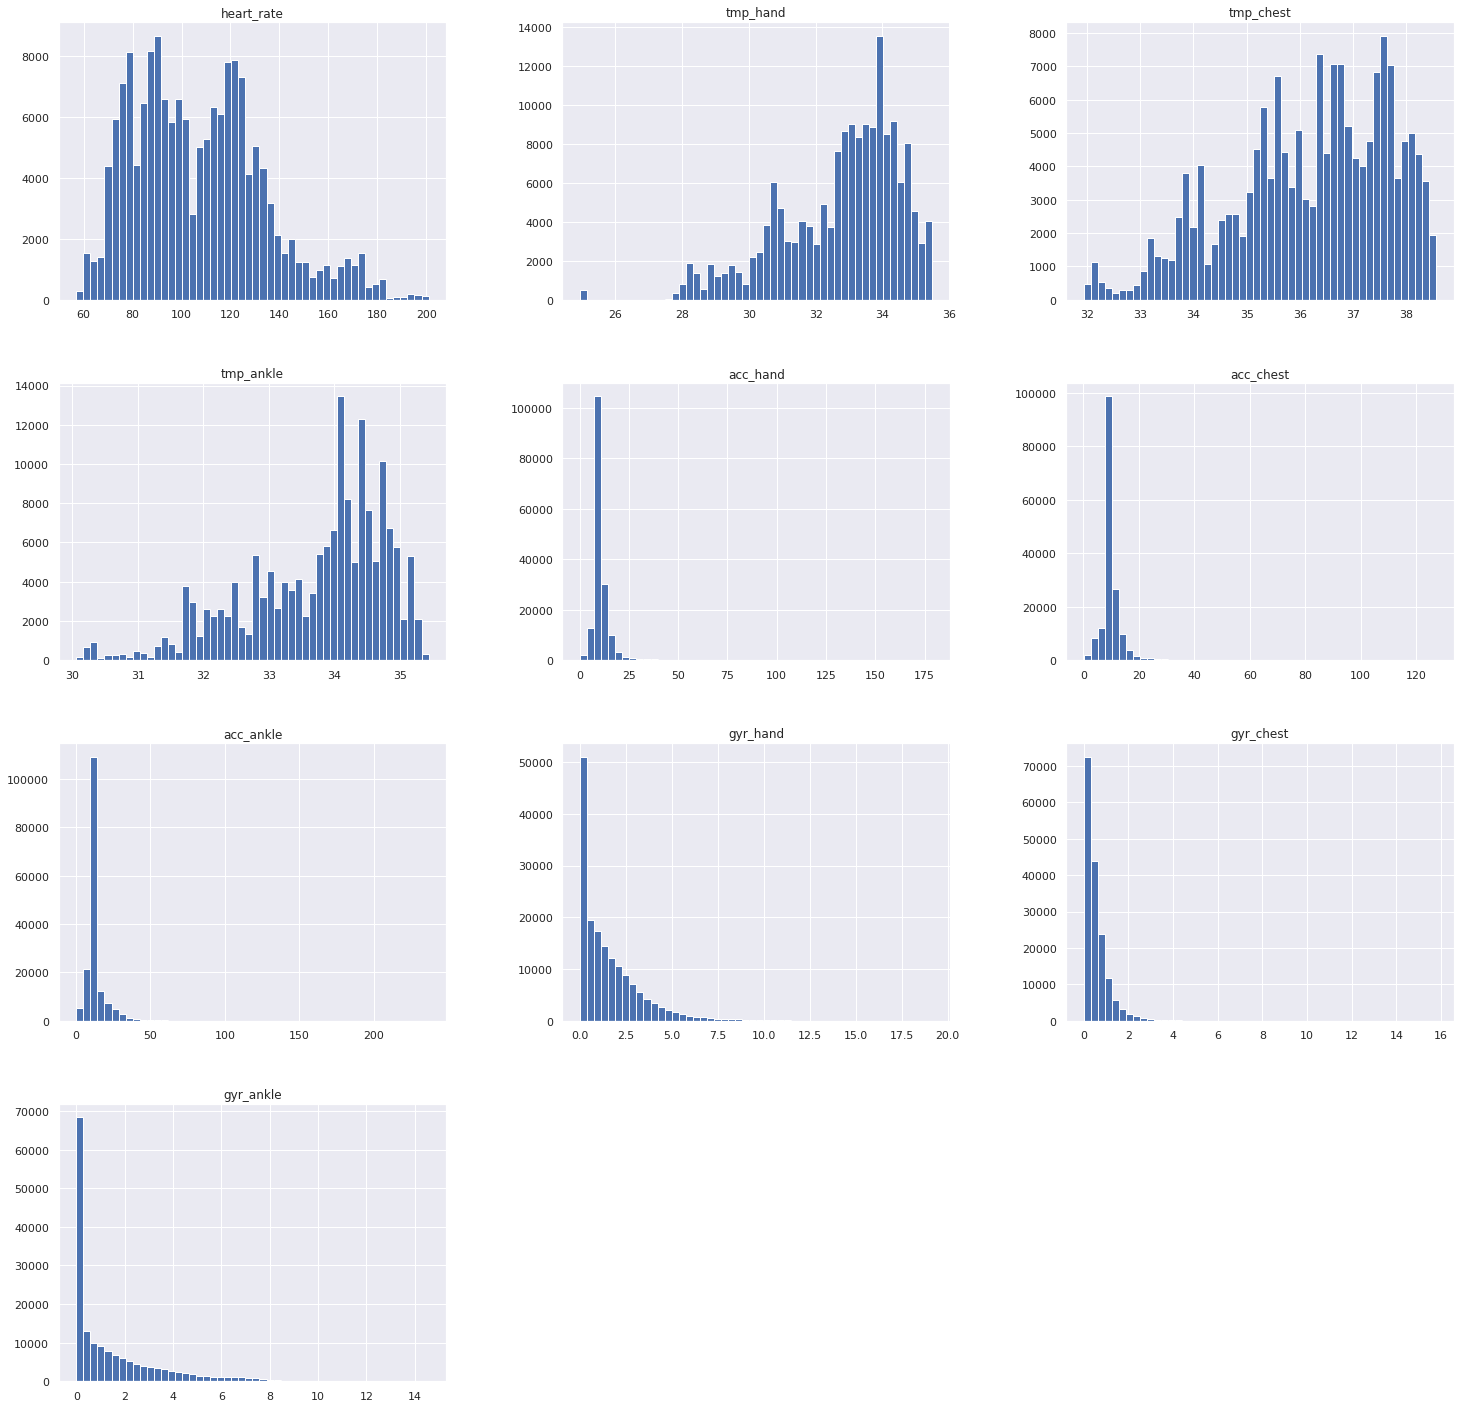

In [ ]:
df_final.hist(figsize = (25,25), bins = 50)
plt.show()

Most of the attributes have non - normal distribution. However since the sample size is high(for test data also), we can confidently perform a t-test later. There appears to be outliers in the hand temperature data set, however since the data is entered by the sensors, there might be chance that it is related to some specific activity, because of which I am not removing those outliers. The mean of the acceleration values is around $9.81$ , which accounts to the fact that  accelerometer measures the value of accelertion due to gravity at rest, which is around $9.81$ https://en.wikipedia.org/wiki/Talk%3AAccelerometer.

Also the mode of gyroscope data is around $0$, indicating that the angular acceleration of the body parts are close to zero majority of the time.

Now let's analyze different attributes individually

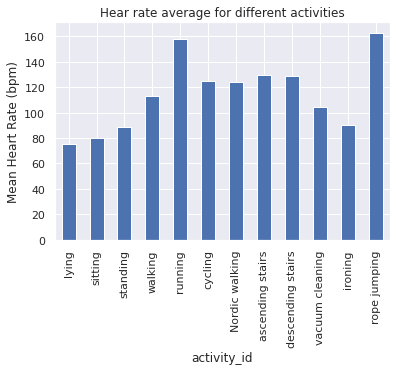

In [ ]:
sn.set()
df_HR_mean =df_train['heart_rate'].groupby(df_train['activity_id']).mean()#grouping heart rate data wrt activity id and finds the mean of heart rate for each activity
df_HR_mean.index = df_HR_mean.index.map(activity_id)# to get the real activity id as index
df_HR_mean.plot(kind = 'bar')
plt.ylabel("Mean Heart Rate (bpm)")
plt.title('Hear rate average for different activities')
plt.show()

From the above bar chart it is evident that for physically easy activities (for a normal human) like sitting, lying, standing and ironing, the heart rates average is on the lower spectrum, close to the normal heart rate of $72 \,bpm$. However, for slightly physically challenging activities like cylcing, Nordic Walking, ascending and descending stairs have an average heart rate over $120 \, bpm$. For heavy activities indulging in vigourous movement of body parts like running and rope jumping the average heart rate is over $150 \,bpm$. 

Among all the 12 activities, rope jumping has the highest heart rate($160 \, bpm$) and lying has the least average heart rate ($75 \, bpm$).

#### Acceleration analysis

In [ ]:
# To find the hand,chest and ankle average accelaration
df_Acc_hand_mean = df_train['acc_hand'].groupby(df_train['activity_id']).mean() - 9.81 # 9.81(accelartion due to gravity) is reduced so that while plotting it will give better idea of vigour of the movement of the body part
df_Acc_chest_mean = df_train['acc_chest'].groupby(df_train['activity_id']).mean() - 9.81
df_Acc_ankle_mean = df_train['acc_ankle'].groupby(df_train['activity_id']).mean() - 9.81

df_Acc_hand_mean.index = df_Acc_hand_mean.index.map(activity_id)
df_Acc_chest_mean.index = df_Acc_chest_mean.index.map(activity_id)
df_Acc_ankle_mean.index = df_Acc_ankle_mean.index.map(activity_id)

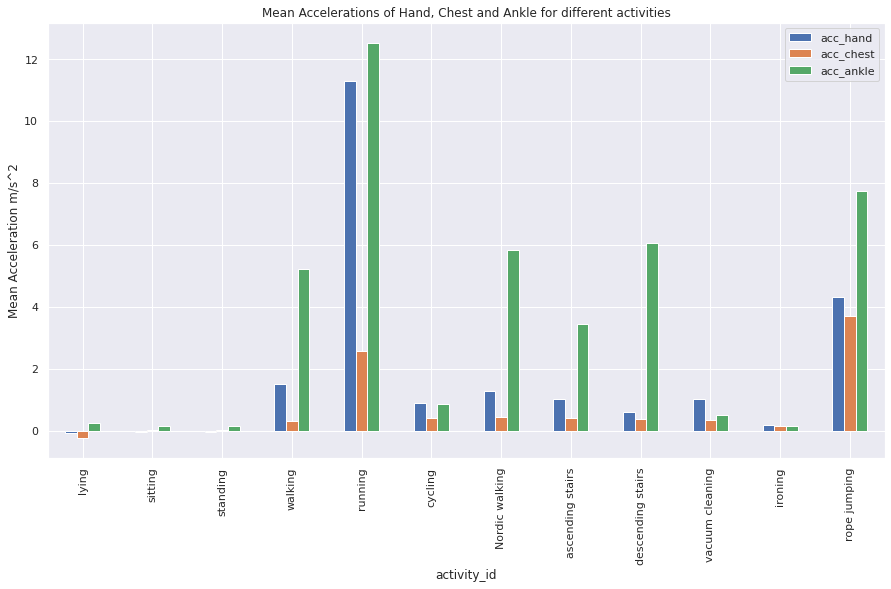

In [ ]:
df_acc_mean = pd.concat([df_Acc_hand_mean,df_Acc_chest_mean,df_Acc_ankle_mean],axis = 1)# concating the different means togather so that it can be plotted in the same plot as a tripple bar graph
df_acc_mean.plot(kind = 'bar', figsize = (15,8))
plt.ylabel('Mean Acceleration m/s^2')
plt.title('Mean Accelerations of Hand, Chest and Ankle for different activities')
plt.show()

As expected, physically non challenging activities (lying,sitting,standing,ironing) have very low mean acceleration of different body parts. However physically challenging activities like running and rope jumping has considerably high mean acceleration value for ankle and hand. Also, activities with considerable leg movements like walking, Nordic walking,ascending and discending stairs have high ankle, cycling being an exception.

The chest acceleration is low for almost all activities except for rope jumping.

#### Angular velocity analysis

In [ ]:
# To find the hand,chest and ankle average angular velocity
df_gyr_hand_max = df_train['gyr_hand'].groupby(df_train['activity_id']).mean()
df_gyr_chest_max = df_train['gyr_chest'].groupby(df_train['activity_id']).mean()
df_gyr_ankle_max = df_train['gyr_ankle'].groupby(df_train['activity_id']).mean()

df_gyr_hand_max.index = df_gyr_hand_max.index.map(activity_id)
df_gyr_chest_max.index = df_gyr_chest_max.index.map(activity_id)
df_gyr_ankle_max.index = df_gyr_ankle_max.index.map(activity_id)

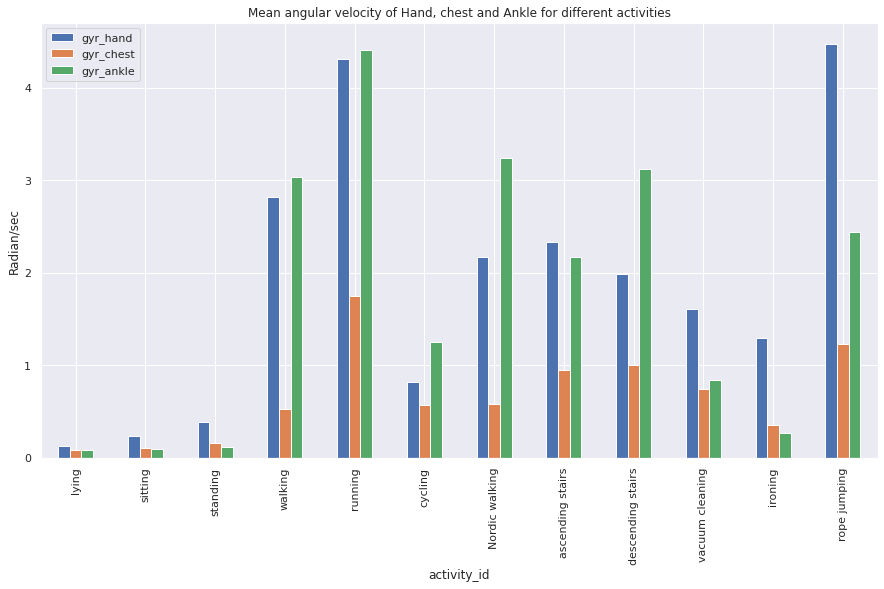

In [ ]:
df_angular_vel_max = pd.concat([df_gyr_hand_max,df_gyr_chest_max,df_gyr_ankle_max],axis =1)# concating the different means togather so that it can be plotted in the same plot as a tripple bar graph
df_angular_vel_max.plot(kind = 'bar', figsize = (15,8))
plt.ylabel('Radian/sec')
plt.title('Mean angular velocity of Hand, chest and Ankle for different activities')
plt.show()

* From the above bar chart it is observed that physically non challenging activites have low angular velocity for each body part,except ironing, which has considerable mean angular acceleration in hand.

* Running have high mean angular acceleration $\approx 4.2\, rad/sec$ for both hand and ankle. Rope jumping has the highest mean hand angular acceleration $\approx 4.5 \, rad/sec$ but with low ankle acceleration compared to the hand.

* Descending stairs have much higher mean ankle acceleration than ascending

In [ ]:
list_activities = list(df_gyr_hand_max.index)# just to get the list of 12 activities which are protocol activities
list_activities

['lying',
 'sitting',
 'standing',
 'walking',
 'running',
 'cycling',
 'Nordic walking',
 'ascending stairs',
 'descending stairs',
 'vacuum cleaning',
 'ironing',
 'rope jumping']

In [ ]:
#To see how the temperature data description of the hand for different activitites
df_tmp_hand = df_train[['tmp_hand']].groupby(df_train['activity_id'])
k = df_tmp_hand.describe()
k.index = df_tmp_hand.describe().index.map(activity_id)# To change the index to the real index

In [ ]:
k

tmp_hand                                                  \
                     count       mean       std      min      25%      50%   
activity_id                                                                  
lying              13454.0  32.727363  1.404591  30.1875  31.3125  32.8750   
sitting            12873.0  33.266478  1.102424  31.5000  32.1250  33.5000   
standing           13255.0  33.643172  0.854488  32.1875  33.0000  33.5625   
walking            16803.0  32.302830  1.371568  28.7500  31.3750  32.5625   
running             6616.0  30.792345  2.096444  27.9375  28.8125  30.8125   
cycling            11465.0  30.997710  1.991426  27.6250  29.3125  31.0000   
Nordic walking     13154.0  31.528654  1.747679  28.9375  30.3125  30.7500   
ascending stairs    7313.0  33.527990  0.870470  31.7500  32.5625  33.7500   
descending stairs   6367.0  33.319087  0.875995  31.6250  32.4375  33.5625   
vacuum cleaning    12179.0  34.181311  0.651642  33.0625  33.6875  34.1250   
ironing            16768.0  34.026459  0.774501  32.6250  33.4375  33.9375   
rope jumping        3180.0  29.751572  2.455088  24.9375  28.4375  30.1875   

                                     
                       75%      max  
activity_id                          
lying              33.8125  34.9375  
sitting            34.2500  35.0625  
standing           34.3750  35.2500  
walking            33.0625  34.8125  
running            33.8125  33.8750  
cycling            32.7500  34.6875  
Nordic walking     33.0000  34.9375  
ascending stairs   34.1250  35.1250  
descending stairs  33.8750  34.8750  
vacuum cleaning    34.6250  35.5000  
ironing            34.6875  35.4375  
rope jumping       30.8125  33.8750

From the above data Frame, it is evident that the temperature mean is maximum for vaccum cleaning, may be beacuse of the hot air emitted by the machine. All the other activities which are physically not challenging has similar mean temperature.

It is interesting to note that for activities including vigourous movement of the hand, the hand temperature is much lesser compared to other activities.

1. Rope jumping : $29.75^\circ C$
1. Running: $30.79^\circ C$
1. Cycling: $30.99^\circ C$


The possible reason for this observation might be because of the high air(normal temperature,unlike in vaccum cleaning)movement wrt the hand while doing these activities and that might have caused high heat carrying rate from the hand by the air

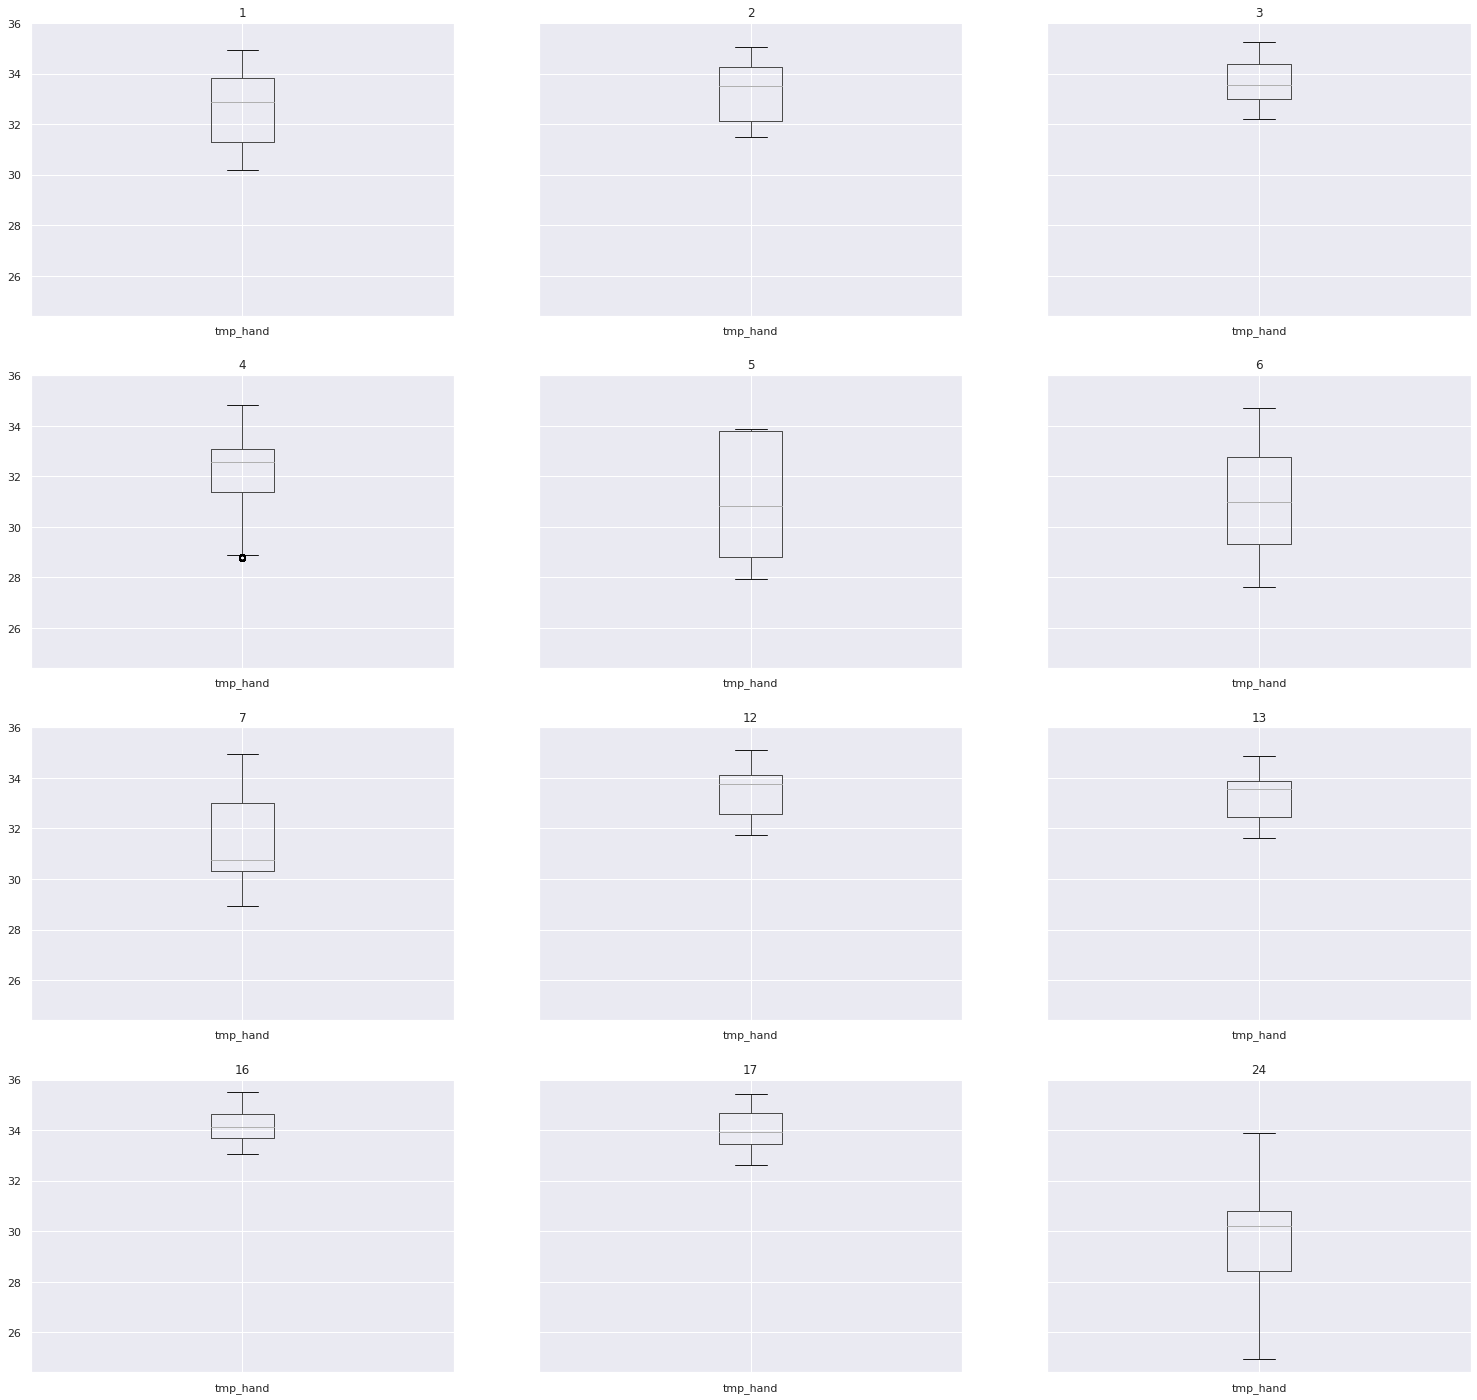

In [ ]:
#Box plot for temperature variation of the hand for different activities
df_tmp_hand.boxplot(figsize = (25,25))
plt.show()

From the abouve boxplot, it can be observed that, the varience of the temperature is maximum for the rope jumping(activity 24)and the least for vaccum cleaning(activity 16). The temperature variation is less for ironing also(activity 17)

In [ ]:
#average values of all the sensor data for different subject ID
df_average =df_train.pivot_table(index = 'SubjectID')# pivoting the table wrt the subject ID
df_average1 =df_average.drop(["activity_id","timestamp"],axis = 1)
df_average1

,acc_ankle,acc_chest,acc_hand,gyr_ankle,gyr_chest,gyr_hand,heart_rate,tmp_ankle,tmp_chest,tmp_hand
SubjectID,,,,,,,,,,
1,12.852717,10.349247,11.278277,1.482593,0.599895,1.755001,122.122412,33.653086,35.223589,32.413188
2,12.234689,10.241069,10.863060,1.586608,0.611787,1.884836,109.152004,34.258991,36.333911,32.334617
3,11.865050,9.934454,10.730130,1.043837,0.405025,1.504964,94.069980,33.509978,35.777066,31.885546
4,11.711142,9.991532,10.311891,1.231305,0.467321,1.242908,109.147494,33.580857,35.123352,31.894387
5,12.984013,10.306983,11.147082,1.664904,0.559060,1.565724,108.099952,34.209415,37.442860,34.775655
6,12.684995,10.207488,12.025811,1.621959,0.621787,1.723947,102.710386,34.719021,35.822392,32.295891
7,12.517294,10.025140,10.412051,1.498710,0.417871,1.074302,96.308585,32.232302,36.759969,32.941411
8,12.876733,10.436470,11.344793,1.614339,0.521759,1.632943,109.350975,33.347641,36.701418,33.155389
9,19.252505,12.983880,14.603923,2.421016,1.108171,3.230483,148.465473,31.427749,32.242487,25.057705


It should be noted that all the sensory data mean values are highest for subject ID 9 except temperature data, with a very high mean heart rate of $148.46 \,  bpm$. But this information is highly biased since the subject 9 has only done one protocol activity which is rope jumping. If we consider only rope jumping other candidates also have similar heart rates.

In [ ]:
#average value of sensor data for different activities
df_average_activity = df_train.pivot_table(index = 'activity_id')#pivoting table wrt the activity id
df_average_activity.index  = df_average_activity.index.map(activity_id)
df_average_activity_new=df_average_activity.drop(['SubjectID'],axis = 1)
df_average_activity_new

,acc_ankle,acc_chest,acc_hand,gyr_ankle,gyr_chest,gyr_hand,heart_rate,timestamp,tmp_ankle,tmp_chest,tmp_hand
activity_id,,,,,,,,,,,
lying,10.060279,9.578504,9.725752,0.084575,0.085093,0.126573,75.104727,205.703536,32.975537,35.089890,32.727363
sitting,9.972249,9.820942,9.756177,0.091051,0.108635,0.229028,79.674435,506.954670,33.644164,35.830148,33.266478
standing,9.955005,9.837908,9.781892,0.116558,0.163810,0.388571,88.625424,733.169661,33.900453,36.166352,33.643172
walking,15.024392,10.113284,11.303542,3.036188,0.523465,2.814273,112.822353,2429.324117,33.839009,37.006141,32.302830
running,22.345557,12.384570,21.090850,4.412283,1.744831,4.315094,157.956771,3446.232337,33.160331,34.370768,30.792345
cycling,10.670248,10.218884,10.704182,1.255481,0.573903,0.815534,125.155953,3131.042837,33.170568,35.718551,30.997710
Nordic walking,15.656702,10.238068,11.109071,3.242735,0.579569,2.174587,124.300517,2905.742301,33.436307,36.150228,31.528654
ascending stairs,13.250245,10.219511,10.820882,2.166308,0.947454,2.335684,129.654998,1807.425661,34.166642,37.050065,33.527990
descending stairs,15.872006,10.174196,10.409700,3.122998,1.001569,1.984584,128.997487,1907.047790,34.178813,37.001865,33.319087


Again, the main take away from this table is that the all the sensor data except temperature is maximum for the activity rope jumping. Except acceleration of the ankle and temperature, all the sensor data is the least for the activity lying.

Now let us find out the correleation between all the sensor data.

In [ ]:
#removing unsuitable columns for correlation
df_train1 = df_train.drop(['SubjectID','activity_id','timestamp'],axis =1)

To find the correlation we have to use the **Spearman** correlation method as most of the sensor data distribution is not following normal distribution.

In [ ]:
df_train1.corr(method = 'spearman').style.background_gradient()


,heart_rate,tmp_hand,tmp_chest,tmp_ankle,acc_hand,acc_chest,acc_ankle,gyr_hand,gyr_chest,gyr_ankle
heart_rate,1.000000,-0.350788,-0.038416,-0.060610,0.175093,0.084133,0.279892,0.635201,0.677574,0.735719
tmp_hand,-0.350788,1.000000,0.742656,0.506795,-0.119221,0.018365,-0.128357,-0.163575,-0.148192,-0.272813
tmp_chest,-0.038416,0.742656,1.000000,0.454020,-0.045145,0.070020,0.038284,0.128450,0.096187,0.130395
tmp_ankle,-0.060610,0.506795,0.454020,1.000000,-0.005031,0.045421,-0.046598,0.124971,0.075603,-0.012598
acc_hand,0.175093,-0.119221,-0.045145,-0.005031,1.000000,0.395884,0.171024,0.241500,0.216159,0.169837
acc_chest,0.084133,0.018365,0.070020,0.045421,0.395884,1.000000,0.207340,0.059642,0.128828,0.091379
acc_ankle,0.279892,-0.128357,0.038284,-0.046598,0.171024,0.207340,1.000000,0.206092,0.240517,0.387638
gyr_hand,0.635201,-0.163575,0.128450,0.124971,0.241500,0.059642,0.206092,1.000000,0.702384,0.681162
gyr_chest,0.677574,-0.148192,0.096187,0.075603,0.216159,0.128828,0.240517,0.702384,1.000000,0.704927
gyr_ankle,0.735719,-0.272813,0.130395,-0.012598,0.169837,0.091379,0.387638,0.681162,0.704927,1.000000


* From the above correlation data frame it can be observed that, there is a high correlation between the all the  angular velocity measurements(hand,chest and the ankle) is highly correlated with the heart rate.

* Also another interesting obesrvation is that the Heart rate  is negatively correlelated wth the hand temperature($-0.35$).

* All the temperature measurements are highly positively correlated with each other.

* All the angular velocity measurements are hightly positively correlerated with each other

* However, even though the acceleration values are positively correlated to each other, it is not significant positive correlations.


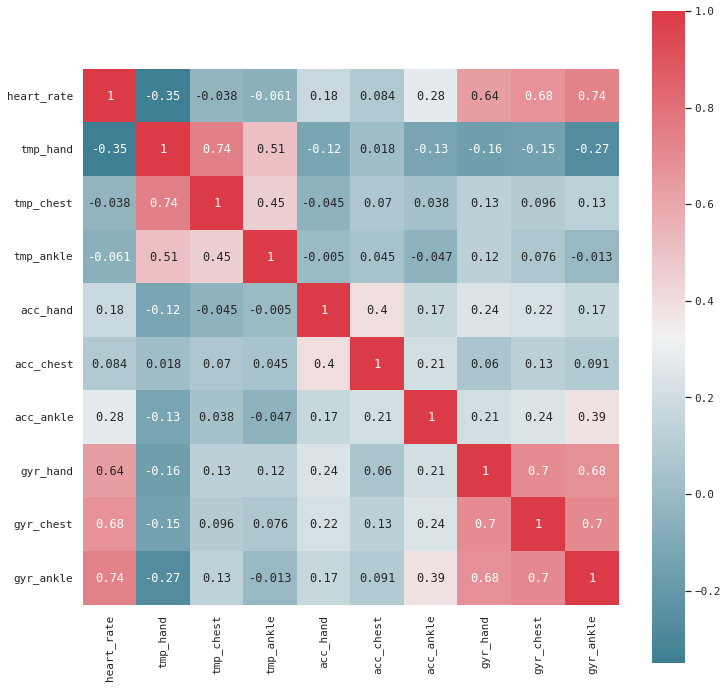

In [ ]:
#heatmap using seaborn for representing the same correlation data frame we saw before

sn.set(font = 'monospace')
df_train1_corr_matrix = df_train1.corr(method='spearman')

fig, axe = plt.subplots(figsize=(12,12))
cmap = sn.diverging_palette(220,10,center = "light", as_cmap=True)

sn.heatmap(df_train1_corr_matrix,vmax=1,square =True, cmap=cmap,annot=True );

As we have done significant Exploratory data anlaysis, let us now test our hypothesis.

## Hypothesis testing

#### Hypothesis testing 1a)

If angular velocity of the ankle is higher for higher Heart Rate, then for higher angular velocity of the ankle the Heart Rate should be Higher

Null Hypothesis
* $H0$: Correlation = 0

Alternate Hypothesis
* $H1$: Correleation> 0

Here I am doing the hypothesis on correlation, Hence i am using `spearmanr` method from `scipy.stats` module since the data is not normally distributed



In [ ]:
#My correlation Hypothesis testing function
def hypothesis_testing_corr(data1,data2):
  correlation,p_value = spearmanr(data1,data2)#spearmanr gives correlation and p_value as output
  print('correlation between the parameters = {}'.format(correlation))#prints the correlation
  print('p_value = {}'.format(p_value))#prints the p-value
  for i in [0.01 , 0.05, 0.1]:
      if p_value < i:
        print('The null Hypothesis H0 is rejected at a confidence interval of {}%'.format(100 -i*100))
        break

      else:
        print('Failed to reject the null Hypothesis at {}% of confidence interval'.format(100-i*100))

In [ ]:
hypothesis_testing_corr(df_test['gyr_ankle'],df_test['heart_rate']) #calling hypothesis function on the angular velocity and heart rate data

correlation between the parameters = 0.731430460008059
p_value = 0.0
The null Hypothesis H0 is rejected at a confidence interval of 99.0%


From the above hypothesis testing it is evident that the correlation between the parameters heart rate and angular velocity of the ankle is +vely correlated and the correlation is statistically significant.

#### Hypothesis testing 1)b

If angular velocity of the hand is higher for higher heart rate, then for higher angular velocity of the hand, the Heart rate will be higher.

Null Hypothesis
* $H0$: correlation = 0

Alternative Hypothesis
* $H1$: correlation > 0


Here also I am using `spearmanr` method for the hypothesis testing since the data are not normally distributed

In [ ]:
hypothesis_testing_corr(df_test['gyr_hand'],df_test['heart_rate'])#calling hypothesis function 

correlation between the parameters = 0.6310230405790714
p_value = 0.0
The null Hypothesis H0 is rejected at a confidence interval of 99.0%


From the above hypothesis testing it is evident that the correlation between  angular velocity of the hand and the heart rate is +ve and is statistically significant.

From both this hypothesis testing we can come to a conclusion that, generally for higher angualr velocity of the limbs of a person (ie  more  the vigour  of hand and the leg movement),The heart rate of the person will be higher.

## Modelling

Our aim is to help develop a hardware/software for detecting the activity performed by a person. For that we have to develop and test some model, which can be used to predict the activity performed by the person given the sensor data


By using Accelerometer, Heart Rate measuring device and Gyroscope and temperature measurement

In [ ]:
from sklearn.metrics import precision_score,recall_score, f1_score, confusion_matrix, accuracy_score,ConfusionMatrixDisplay
from sklearn.svm import SVC #importig svm model


In [ ]:
#Shuffling the data set
df_final2 = df_raw3.sample(frac = 1, random_state = 33)

In [ ]:
#Dropping timestamp and subject id
df_final3 = df_final2.drop(['timestamp','SubjectID'],axis = 1)

In [ ]:
df_features = df_final3.drop(['activity_id'],axis = 1)#features dataframe
df_target = df_final3['activity_id']#target


In [ ]:
scaler = RobustScaler()#Robust scaler is used since the data is skewed and not normally distributed
X_train,X_test,y_train,y_test = train_test_split(df_features,df_target,test_size = 0.2,random_state = 42)#test train split
X_train = scaler.fit_transform(X_train)#scaling the train data
X_test = scaler.transform(X_test)#scaling the train data using the same scalar object

In [ ]:
def get_metrics (y_true,y_pred):# function to get accuracy,precision,Recall and F1 score of the data
    acc = accuracy_score(y_true, y_pred)
    
    p = precision_score(y_true, y_pred,average=None).mean()#average precision 
    r = recall_score(y_true, y_pred, average=None).mean()#average recall
    f1 = f1_score(y_true, y_pred, average=None).mean()#average f1 score
   
    print("Accuracy:  ",acc)
    
    print("Precision: ", p)
    print("Recall:    ", r)
    print("F1:        ", f1)

In [ ]:
#function to show the confusion matrix
def show_Confusion_matrix(y_true,y_predicted):  
  cm = confusion_matrix(y_true,y_predicted)
  plt.rcParams['figure.figsize'] = (18,10)#setting the scale to get bigger display
  disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels = list_activities)
  disp.plot(xticks_rotation= 'vertical',colorbar = True,cmap = 'binary' )
  plt.show()


While doing the training and testing, it might take lot of time for the model to perform it since the number of features is high. However we can get the help of PCA(principle component analysis) to project and reduce the dimetion of the features and hence the train and test time might be reduced.



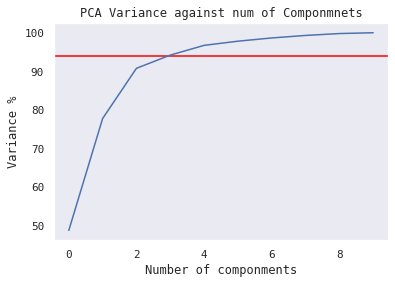

In [ ]:
from sklearn.decomposition import PCA #importing PCA from Sklearn
pca = PCA()
pca.fit(X_train)#fitting the train data
var= pca.explained_variance_ratio_ # explains how much variance is captured by the number of components
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.title("PCA Variance against num of Componmnets")
plt.ylabel("Variance %")
plt.xlabel("Number of componments")
l = plt.axhline(94, color="red")# the meeting point between the line and the curve will give how many components we have to consider for capturing 94% variance

plt.plot(var1)
plt.grid()

From the above graph, we can see that both the lines meet for x = 3, which means that for our data we need 3 features to capture 94% of the variation

In [ ]:
pca = PCA(n_components=3)# creating PCA object for 3 features
X_train=pca.fit_transform(X_train)#fitting X_train
X_test=pca.transform(X_test)#using the same pca object to transform X_test

In [ ]:
X_train_df = pd.DataFrame(X_train,columns=['PCA_1','PCA_2','PCA_3' ])#the columns show the 3 columns created by the PCA object
X_train_df

,PCA_1,PCA_2,PCA_3
0,-0.672502,0.823953,1.391981
1,2.259840,2.435209,-1.885466
2,-1.163559,-0.975399,-0.648164
3,-1.668698,-0.719334,-0.414545
4,-1.696680,-0.139937,1.005519
...,...,...,...
133422,-1.296752,-0.892497,-0.470731
133423,-1.227306,-0.497782,0.118455
133424,4.783846,8.569231,-1.649441
133425,-0.281223,-1.076797,0.345656


In [ ]:
from sklearn.svm import SVC

In [ ]:
%%time
SVCmodel = SVC(kernel = 'rbf')
SVCmodel.fit(X_train, y_train)

CPU times: user 11min 53s, sys: 2.4 s, total: 11min 56s
Wall time: 11min 53s


It can be observed that the SVC model takes 12 mins to train the data with PCA approach

In [ ]:
%%time
SVCmodel_y_pred = SVCmodel.predict(X_test)
print(len(SVCmodel_y_pred))
print(len(y_test))
print(SVCmodel_y_pred[0:5])
print(y_test[0:5])

33357
33357
[ 3 16 13 17 16]
25159      2
41280      6
114236    13
28227     17
27783     17
Name: activity_id, dtype: int64
CPU times: user 5min 12s, sys: 788 ms, total: 5min 13s
Wall time: 5min 12s


Also it takes 5 mins to test the data with PCA

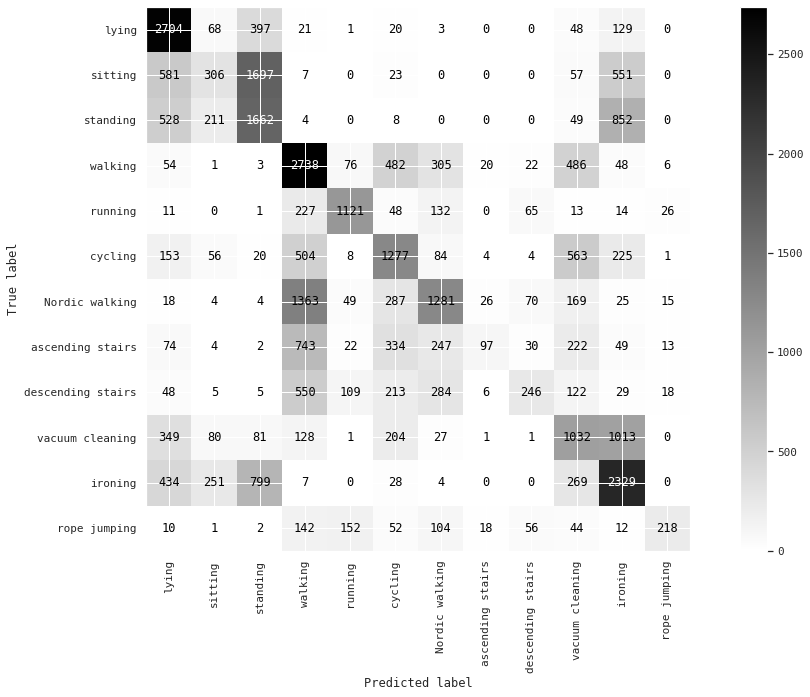

In [ ]:
#shows the confusion matrix
show_Confusion_matrix(y_test,SVCmodel_y_pred)

In [ ]:
get_metrics(y_test,SVCmodel_y_pred)

Accuracy:   0.4500104925502893
Precision:  0.4904133512254851
Recall:     0.41116677006007385
F1:         0.4051920003027694


Here by using SVM model with PCA we get very low scores. Let us check if it is because of the implementation of the PCA

### SVC model without using PCA

In [ ]:
#shuffling 
df_final2 = df_raw3.sample(frac = 1, random_state = 33)

In [ ]:
df_final3 = df_final2.drop(['timestamp','SubjectID'],axis = 1)#dropping 

In [ ]:
df_features = df_final3.drop(['activity_id'],axis = 1)#feature
df_target = df_final3['activity_id']#target


In [ ]:
scaler = RobustScaler()#since data is not normal and skewed
X_train,X_test,y_train,y_test = train_test_split(df_features,df_target,test_size = 0.2,random_state = 42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
%%time
SVCmodel = SVC(kernel = 'rbf')#Eusing svm model
SVCmodel.fit(X_train, y_train)

CPU times: user 6min 48s, sys: 1.2 s, total: 6min 49s
Wall time: 6min 47s


Now we can see that the SVC model has taken only 8 mins to fit and train the model.And it is 33% faster than when we applied the PCA! This is an unexpected observation.

In [ ]:
%%time
SVCmodel_y_pred = SVCmodel.predict(X_test)
print(len(SVCmodel_y_pred))
print(len(y_test))
print(SVCmodel_y_pred[0:5])
print(y_test[0:5])

33357
33357
[ 2  6 13 17 16]
25159      2
41280      6
114236    13
28227     17
27783     17
Name: activity_id, dtype: int64
CPU times: user 3min 46s, sys: 671 ms, total: 3min 46s
Wall time: 3min 45s


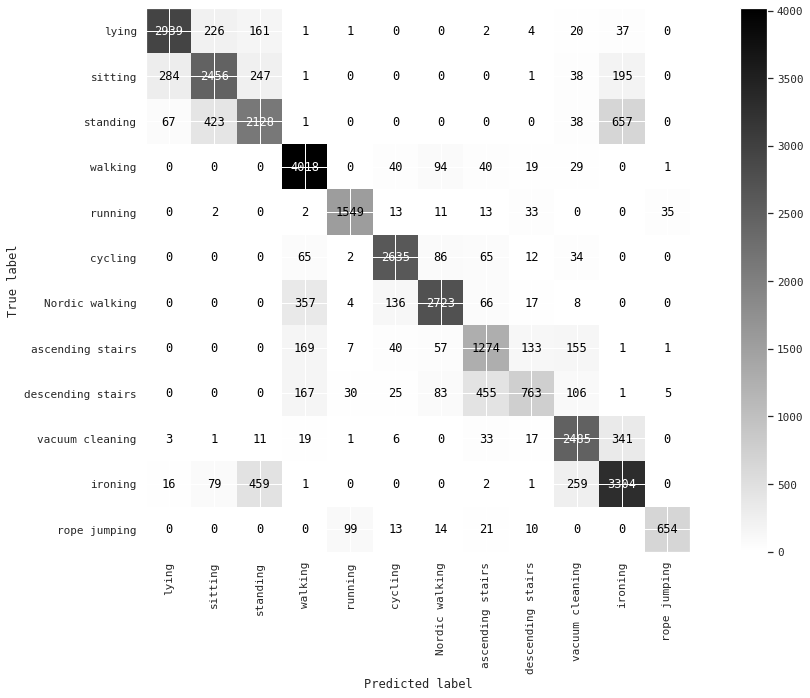

In [ ]:
show_Confusion_matrix(y_test,SVCmodel_y_pred)

In [ ]:
get_metrics(y_test,SVCmodel_y_pred)# to get the score

Accuracy:   0.8072668405432143
Precision:  0.8137950257204051
Recall:     0.7920300483464487
F1:         0.7987669102701833


With out doing dimensionality reduction with PCA, we get an accuracy of 80.72 percent, which is a very significant difference. 

There for I am further not goint to use the PCA since PCA in this scenario is slowing down the model as well ans make the model give very poor result

In [ ]:
from sklearn.ensemble import RandomForestClassifier #Using RandomForest model for classification 

In [ ]:
%%time
RFmodel = RandomForestClassifier()#creating the model object
RFmodel.fit(X_train,y_train)

CPU times: user 44.6 s, sys: 69.9 ms, total: 44.6 s
Wall time: 44.4 s


RandomForestClassifier only takes 45second to trian our model where as SVM model took almost 8 mins

In [ ]:
RFmodel_y_pred = RFmodel.predict(X_test)#predictions
print(len(RFmodel_y_pred))
print(len(y_test))
print(RFmodel_y_pred[0:5])#to compare the first 5 predictions
print(y_test[0:5])

33357
33357
[ 2  6 13 17 17]
25159      2
41280      6
114236    13
28227     17
27783     17
Name: activity_id, dtype: int64


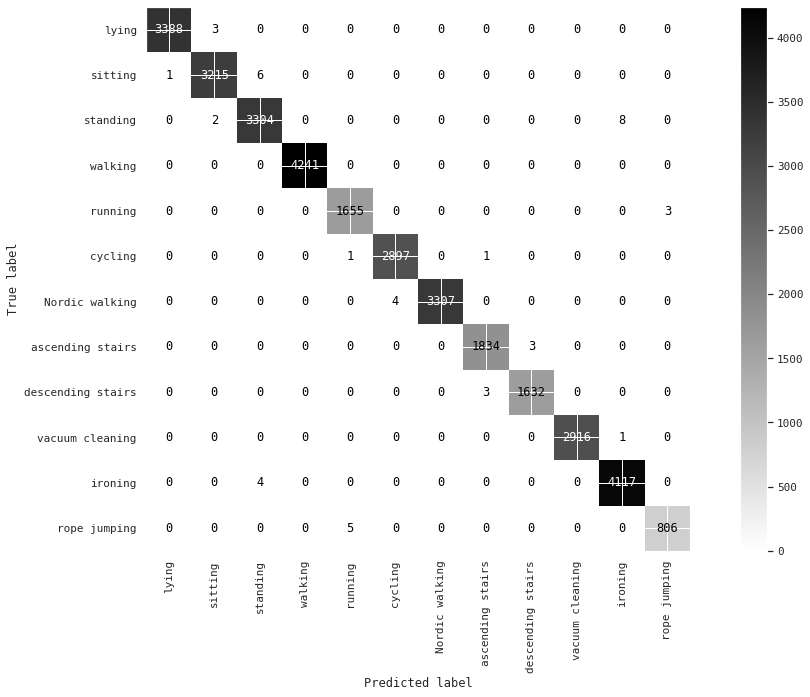

In [ ]:
#showing the confusion matrix
show_Confusion_matrix(y_test, RFmodel_y_pred)

In [ ]:
get_metrics(y_test,RFmodel_y_pred)

Accuracy:   0.9986509578199478
Precision:  0.9983535668635161
Recall:     0.9982725999802512
F1:         0.9983127943581668


The RandomForestModel has nearly perfect scores(accuracy = 99.87% ) by using all the sensor data as the input

By using Heart Rate monitor and Accelerometer and temperature measurement 



In [ ]:
df_final3= df_final2.drop(['SubjectID','timestamp','gyr_hand','gyr_chest','gyr_ankle'],axis = 1)#dropping gyroscope data

In [ ]:
df_features = df_final3.drop(['activity_id'],axis = 1)#features
df_target = df_final3['activity_id']#target


In [ ]:
scaler = RobustScaler()#standardizing non normal data
X_train,X_test,y_train,y_test = train_test_split(df_features,df_target,test_size = 0.2,random_state = 42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
RFmodel = RandomForestClassifier()#creating model object
RFmodel.fit(X_train,y_train)#training the data

RandomForestClassifier()

In [ ]:
RFmodel_y_pred = RFmodel.predict(X_test)#making prediction
print(len(RFmodel_y_pred))
print(len(y_test))
print(RFmodel_y_pred[0:5])#compare the first five results
print(y_test[0:5])

33357
33357
[ 2  6 13 17 17]
25159      2
41280      6
114236    13
28227     17
27783     17
Name: activity_id, dtype: int64


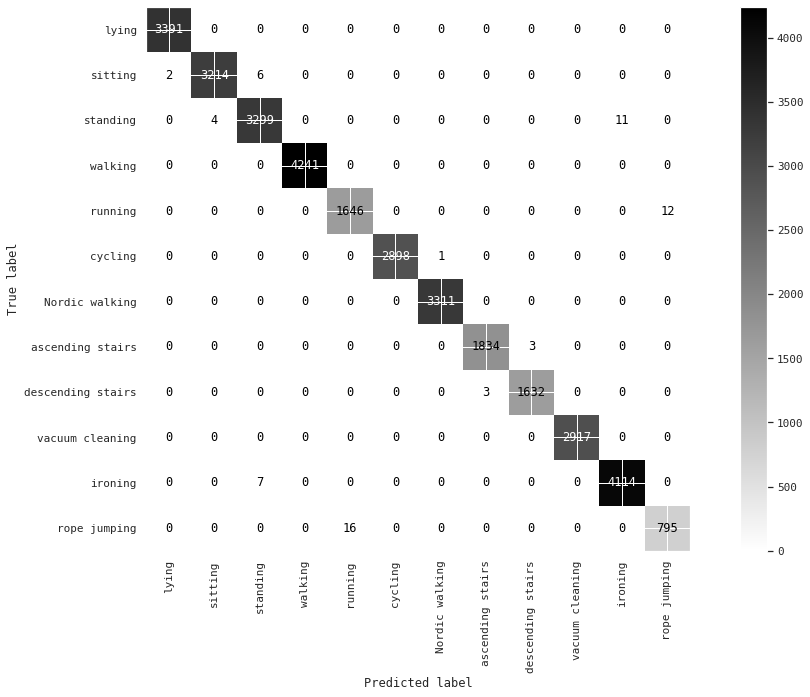

In [ ]:
show_Confusion_matrix(y_test, RFmodel_y_pred)

In [ ]:
get_metrics(y_test,RFmodel_y_pred)#gt the scores

Accuracy:   0.9980513835177024
Precision:  0.9969424182892004
Recall:     0.9967094107508586
F1:         0.9968252232406233


Still we have very high score (accuracy = 99.82%) very slightly less than using all the sensors. But we can observe from the confusion matrix that many of the rope jumping activity is now being classified as running without the presence of gyroscope sensor data.

So if a person is much more physically active then it is not a good idea to avoid the gyroscope sensor as it will mislabel the heavy activities

However if the person doesnt do much of heavy activities which involves rigourous limb movements, We dont have to implement the gyroscope in the hardware

### Without using temperature sensor

In [ ]:
df_final3= df_final2.drop(['SubjectID','timestamp','tmp_hand','tmp_chest','tmp_ankle'],axis = 1)#removing temperature data

In [ ]:
df_features = df_final3.drop(['activity_id'],axis = 1)#features
df_target = df_final3['activity_id']#target


In [ ]:
scaler = RobustScaler()# for standardizing
X_train,X_test,y_train,y_test = train_test_split(df_features,df_target,test_size = 0.2,random_state = 42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
RFmodel = RandomForestClassifier()#creating model object
RFmodel.fit(X_train,y_train)#training the model

RandomForestClassifier()

In [ ]:
RFmodel_y_pred = RFmodel.predict(X_test)#Making the prediction
print(len(RFmodel_y_pred))
print(len(y_test))
print(RFmodel_y_pred[0:5])#comparing the first 5 predictions with original classification
print(y_test[0:5])

33357
33357
[ 3  6 13 17  3]
25159      2
41280      6
114236    13
28227     17
27783     17
Name: activity_id, dtype: int64


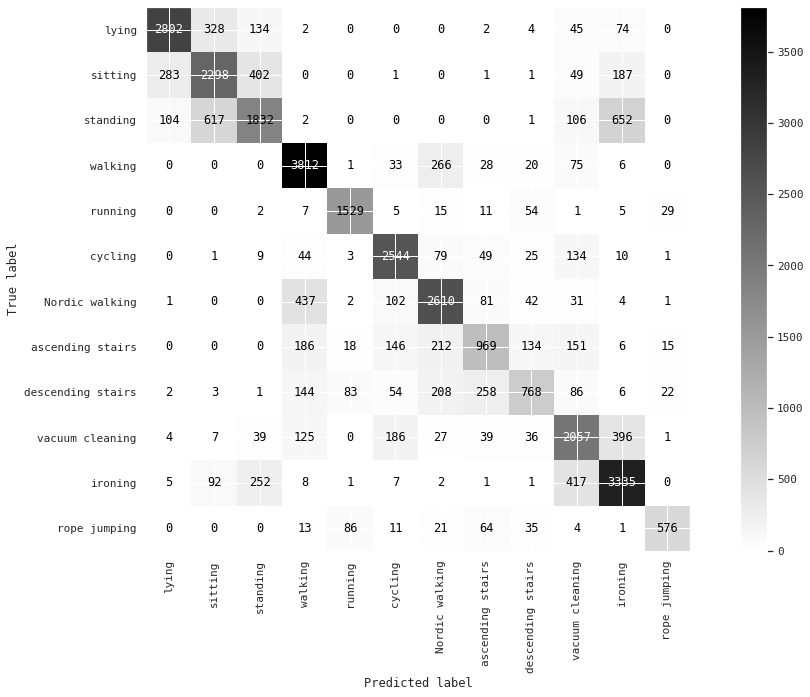

In [ ]:
show_Confusion_matrix(y_test, RFmodel_y_pred)#to show the confusion matrix

In [ ]:
get_metrics(y_test,RFmodel_y_pred)#get score

Accuracy:   0.7534250682015768
Precision:  0.7585103329880315
Recall:     0.7334244972112653
F1:         0.7415414191977404


So from the above observation, we can say that removing the temperature sensor decreases the efficiency of the model to correctly classify the activities.

So, I the use of temperature sensor is mandatory in the hardware.

Now since we are trying to develope a hardware which can classify the activities, wearing sensors in every part of the body is not practical.So we should fit the device either in the hand or the ankle.If we are only looking at the convenience between these two positions,it should be placed in the hand.

However, we should still check if there is much difference in accuracy between both the positons.

### Hardware placed on Hand

In [ ]:
#shuffling 
df_final2 = df_raw3.sample(frac = 1, random_state = 33)

In [ ]:
df_final3 = df_final2.drop(['timestamp','SubjectID','acc_chest','acc_ankle','tmp_chest','tmp_ankle','gyr_chest','gyr_ankle'],axis = 1)#dropping sensor datas from chest and ankle

In [ ]:
df_features = df_final3.drop(['activity_id'],axis = 1)#feature
df_target = df_final3['activity_id']#target


In [ ]:
scaler = RobustScaler()#since data is not normal and skewed
X_train,X_test,y_train,y_test = train_test_split(df_features,df_target,test_size = 0.2,random_state = 42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
RFmodel = RandomForestClassifier()#creating model object
RFmodel.fit(X_train,y_train)#training the model

RandomForestClassifier()

In [ ]:
RFmodel_y_pred = RFmodel.predict(X_test)#Making the prediction
print(len(RFmodel_y_pred))
print(len(y_test))
print(RFmodel_y_pred[0:5])#comparing the first 5 predictions with original classification
print(y_test[0:5])

33357
33357
[ 2  6 13 17 16]
25159      2
41280      6
114236    13
28227     17
27783     17
Name: activity_id, dtype: int64


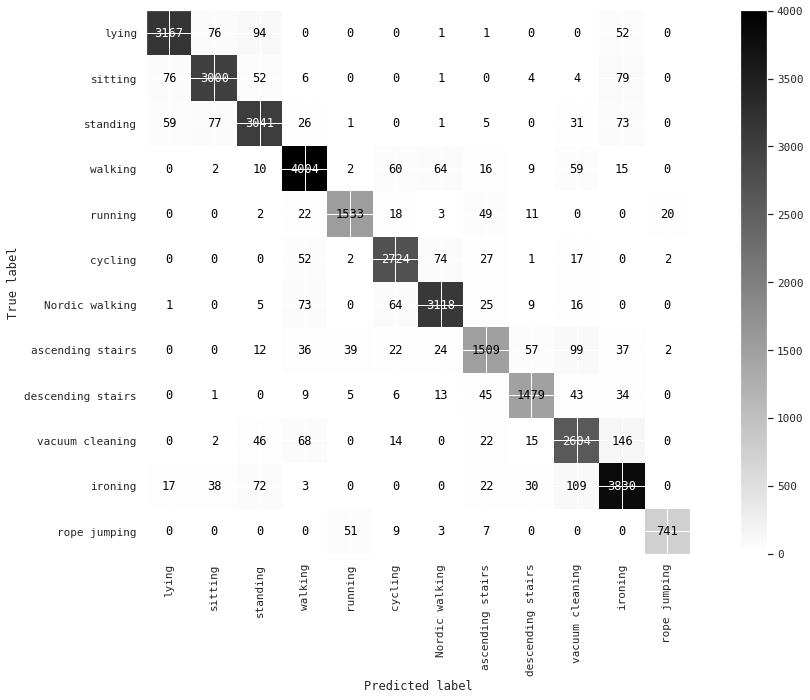

In [ ]:
show_Confusion_matrix(y_test, RFmodel_y_pred)#to show the confusion matrix

In [ ]:
get_metrics(y_test,RFmodel_y_pred)#get score

Accuracy:   0.9218454897023114
Precision:  0.9234731745306096
Recall:     0.9162115370105295
F1:         0.9196552147446061


After modelling we understood that we can have a good accuracy($92.18%$) for the model if the hardware is supposed to design to wear in hand using random forest model.

### Hardware placed on ankle

In [ ]:
#shuffling 
df_final2 = df_raw3.sample(frac = 1, random_state = 33)

In [ ]:
df_final3 = df_final2.drop(['timestamp','SubjectID','acc_chest','acc_hand','tmp_chest','tmp_hand','gyr_chest','gyr_hand'],axis = 1)#dropping sensor data from chest and hand

In [ ]:
df_features = df_final3.drop(['activity_id'],axis = 1)#feature
df_target = df_final3['activity_id']#target


In [ ]:
scaler = RobustScaler()#since data is not normal and skewed
X_train,X_test,y_train,y_test = train_test_split(df_features,df_target,test_size = 0.2,random_state = 42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
RFmodel = RandomForestClassifier()#creating model object
RFmodel.fit(X_train,y_train)#training the model

RandomForestClassifier()

In [ ]:
RFmodel_y_pred = RFmodel.predict(X_test)#Making the prediction
print(len(RFmodel_y_pred))
print(len(y_test))
print(RFmodel_y_pred[0:5])#comparing the first 5 predictions with original classification
print(y_test[0:5])

33357
33357
[ 2  7 13 17 17]
25159      2
41280      6
114236    13
28227     17
27783     17
Name: activity_id, dtype: int64


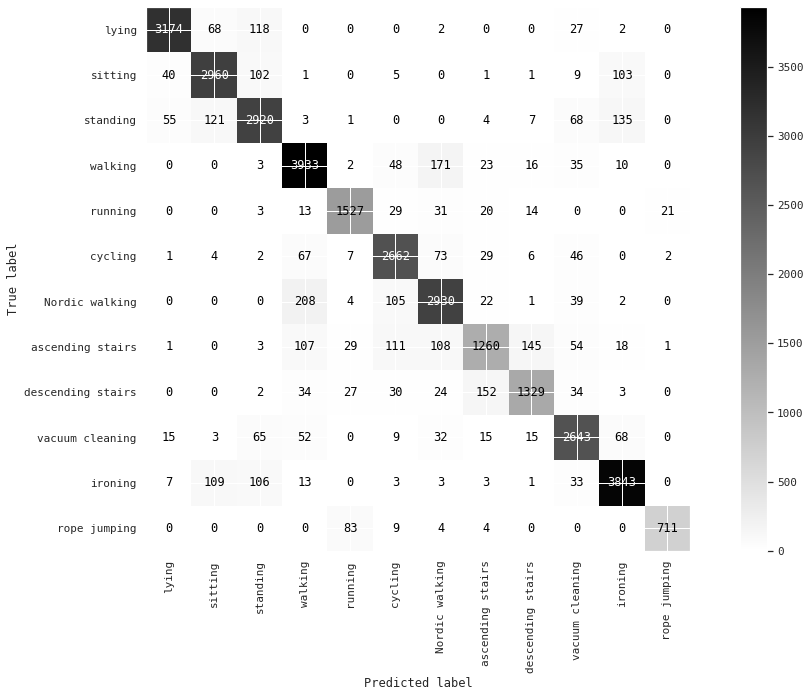

In [ ]:
show_Confusion_matrix(y_test, RFmodel_y_pred)#to show the confusion matrix

In [ ]:
get_metrics(y_test,RFmodel_y_pred)#get score

Accuracy:   0.8961237521359835
Precision:  0.8962512341395699
Recall:     0.883449328929142
F1:         0.888974097381956


From the above modelling using random forest model, we can say that if we place the hardware in the ankle it will have an accuracy of $89.61%$. Which is less than when hardware is placed at hand($92.18%$)

Hence I recommend the hardwear to be designed in such a way that it can be wear in the hand of the person

# Conclusion

The PAMAP2 Physical Activity Monitoring dataset has been analyzed and various insights has been gained.Different sensor data is manipulated in such away that the sensor data all togather can be used as features for help in developing a Hardware/software which can predict the activity performed by the person out of the 12 protocol activities.

Hypothesis testing is done on the test data set to make sure that our findings in explortory data analysis is statistically significant

Finally found a very good model RandomForestClassifier, which takes very low time to calculate the accuracy and very high accuracy while classifying the activities in test data set compared to SVM(support vector machine model).

My final conclusion is that if the commercial hardaware has to be made to classify the activities, the classifier to use is RandomForestClassifier and the Hardware should be designed to wear in hand.

# References

1. Archive.ics.uci.edu. (2012). UCI Machine Learning Repository: PAMAP2 Physical Activity Monitoring Data Set. [online] Available at: http://archive.ics.uci.edu/ml/datasets/pamap2+physical+activity+monitoring

1. poseMethod Technique:Analysis of usain bolt's running technique Available at: https://posemethod.com/usain-bolts-running-technique/ 

1. world Jump Rope records Avalilable at:https://jumpropehub.com/world-jump-rope-record/

1. Talk accelerometer Available at:https://en.wikipedia.org/wiki/Talk%3AAccelerometer.